# Malignant Comments Classifier

# Problem Statement :-

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.


Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   


There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    



Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.


# Business Goal :- 

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

# Data Pre-Processing :-

In [1]:
# Importing Libraries
# Data Manipulation
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install wordcloud

In [3]:
# Machine Learning and Text Processing Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from wordcloud import WordCloud

In [4]:
!pip install neattext

In [5]:
import neattext as nt
import neattext.functions as nfx

In [6]:
# Libraries used for csv file
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
dftrain=pd.read_csv(r'D:\Malignant Comments Classifier Project\malignant_comments_classifier_train.csv')
dftrain.head(10)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9  00040093b2687caa  alignment on this subject and which are contra...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0  
5          0                 0     0       0      0       0  
6          1                 1     1       0      1       0  
7          0                 0     0       0      0       0  
8          0                 0     0       0      0       0  
9          0                 0     0       0      0       0

# Data-set Description :-


The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

The dataset includes

1. Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 

2. Highly Malignant: It denotes comments that are highly malignant and hurtful. 

3. Rude: It denotes comments that are very rude and offensive.

4. Threat: It contains indication of the comments that are giving any threat to someone. 	

5. Abuse: It is for comments that are abusive in nature. 

6. Loathe: It describes the comments which are hateful and loathing in nature.  

7. ID: It includes unique Ids associated with each comment text given.   

8. Comment text: This column contains the comments extracted from various social media platforms. 


In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
dftrain.shape

(159571, 8)

In [9]:
# Creating the new column for comments_length
dftrain['comments_length']=dftrain['comment_text'].str.len()
dftrain.head(10)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9  00040093b2687caa  alignment on this subject and which are contra...   

   malignant  highly_malignant  rude  threat  abuse  loathe  comments_length  
0          0                 0     0       0      0       0              264  
1          0                 0     0       0      0       0              112  
2          0                 0     0       0      0       0              233  
3          0                 0     0       0      0       0              622  
4          0                 0     0       0      0       0               67  
5          0                 0     0       0      0       0               65  
6          1                 1     1       0      1       0               44  
7          0                 0     0       0      0       0              115  
8          0                 0     0       0      0       0              472  
9          0                 0     0       0      0       0               70

In [ ]:
dftrain['comment_text'].apply(lambda x:nt.TextFrame(x).noise_scan()) #noise present in the comment text

In [11]:
print(dftrain.isnull().sum())

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
comments_length     0
dtype: int64


In [ ]:
dftrain['comment_text_noise']=dftrain['comment_text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())
dftrain['comment_text_noise'] # extracted the stopwords from the comment text

# DATA CLEANING 

In [13]:
dftrain['comment_textnew']=dftrain['comment_text'].apply(nfx.remove_stopwords) #removing stopwords

In [14]:
# Removing punctuations Special characters and URL'S
dftrain['comment_textnew']=dftrain['comment_textnew'].apply(nfx.remove_punctuations)
dftrain['comment_textnew']=dftrain['comment_textnew'].apply(nfx.remove_special_characters)
dftrain['comment_textnew']=dftrain['comment_textnew'].apply(nfx.remove_phone_numbers)
dftrain['comment_textnew']=dftrain['comment_textnew'].apply(nfx.remove_urls)

In [15]:
dftrain['clean_length']=dftrain.comment_textnew.str.len()
dftrain.head(10)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9  00040093b2687caa  alignment on this subject and which are contra...   

   malignant  highly_malignant  rude  threat  abuse  loathe  comments_length  \
0          0                 0     0       0      0       0              264   
1          0                 0     0       0      0       0              112   
2          0                 0     0       0      0       0              233   
3          0                 0     0       0      0       0              622   
4          0                 0     0       0      0       0               67   
5          0                 0     0       0      0       0               65   
6          1                 1     1       0      1       0               44   
7          0                 0     0       0      0       0              115   
8          0                 0     0       0      0       0              472   
9          0                 0     0       0      0       0               70   

                                  comment_text_noise  \
0  [why, the, made, under, my, were, they, weren'...   
1                                         [he, this]   
2  [really, not, to, it's, just, that, this, is, ...   
3  [more, i, make, any, on, i, if, the, should, b...   
4                          [are, my, any, you, what]   
5                                [from, me, as, the]   
6                      [before, you, around, on, my]   
7  [your, to, the, has, been, please, don't, do, ...   
8  [if, the, was, to, not, to, anything, in, the,...   
9         [on, this, and, which, are, to, those, of]   

                                     comment_textnew  clean_length  
0  Explanation edits username Hardcore Metallica ...           156  
1  Daww matches background colour Im seemingly st...            91  
2  Hey man Im trying edit war guy constantly remo...           131  
3   cant real suggestions improvement  wondered s...           361  
4         You sir hero chance remember page thats on            42  
5         Congratulations well use tools well  talk             43  
6                               COCKSUCKER PISS WORK            20  
7  vandalism Matt Shirvington article reverted ag...            56  
8  Sorry word nonsense offensive you Anyway Im in...           243  
9               alignment subject contrary DuLithgow            36

# OBSERVATIONS :-


    We could see that the data has been cleaned and is ready to build a ML model. But before that lets get a sense of word traffic in the given data-set.
    This help in understanding the data-set and also helps us in choosing.
    

# Data Visualization :-
    
    We will now create a column integrating all the target.

In [16]:
target=['malignant','highly_malignant','loathe','rude','abuse','threat']

for i in target:
    print(i)
    print(dftrain[i].value_counts())
    print("-----------------------------------")

malignant
0    144277
1     15294
Name: malignant, dtype: int64
-----------------------------------
highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
-----------------------------------
loathe
0    158166
1      1405
Name: loathe, dtype: int64
-----------------------------------
rude
0    151122
1      8449
Name: rude, dtype: int64
-----------------------------------
abuse
0    151694
1      7877
Name: abuse, dtype: int64
-----------------------------------
threat
0    159093
1       478
Name: threat, dtype: int64
-----------------------------------


malignant
0    144277
1     15294
Name: malignant, dtype: int64


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


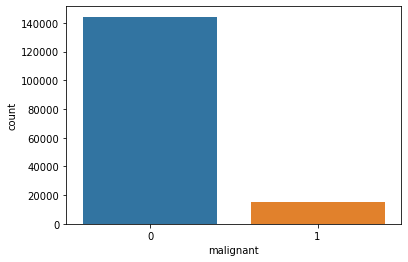

--------------------------
highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


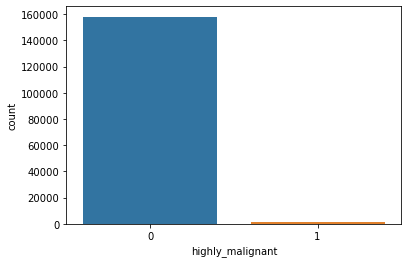

--------------------------
loathe
0    158166
1      1405
Name: loathe, dtype: int64


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


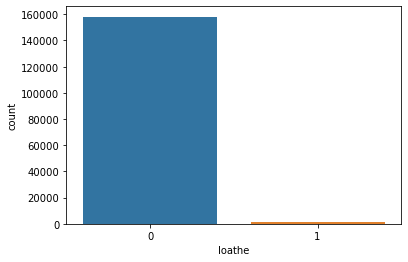

--------------------------
rude
0    151122
1      8449
Name: rude, dtype: int64


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


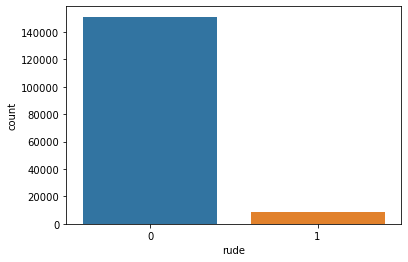

--------------------------
abuse
0    151694
1      7877
Name: abuse, dtype: int64


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


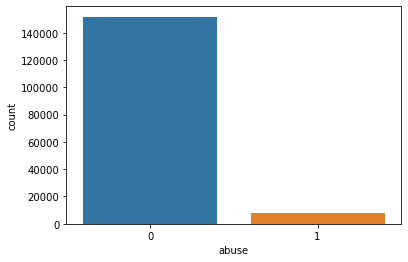

--------------------------
threat
0    159093
1       478
Name: threat, dtype: int64


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


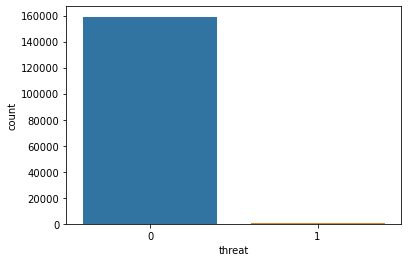

--------------------------


In [17]:
target=['malignant','highly_malignant','loathe','rude','abuse','threat']

for i in target:
    print(i)
    print(dftrain[i].value_counts())
    sns.countplot(dftrain[i])
    plt.show()
    print("--------------------------")

15294


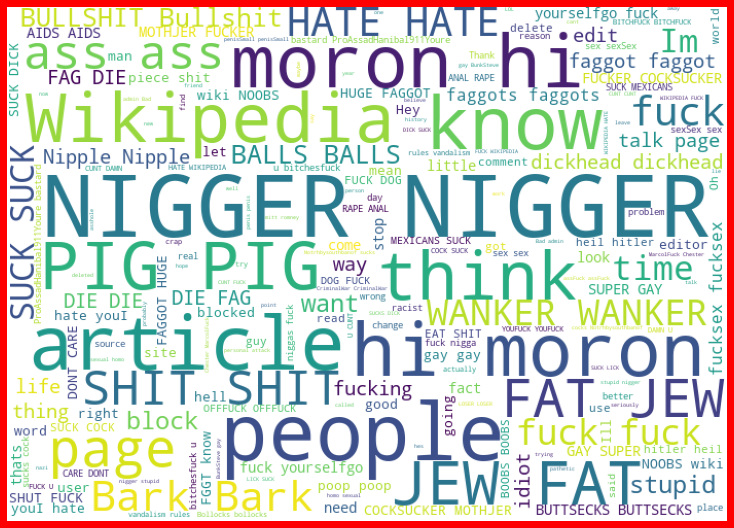

In [18]:
# Getting sense of words in malignant
plot=dftrain['comment_textnew'][dftrain['malignant']==1]
print(len(plot))
plot_cloud=WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

8449


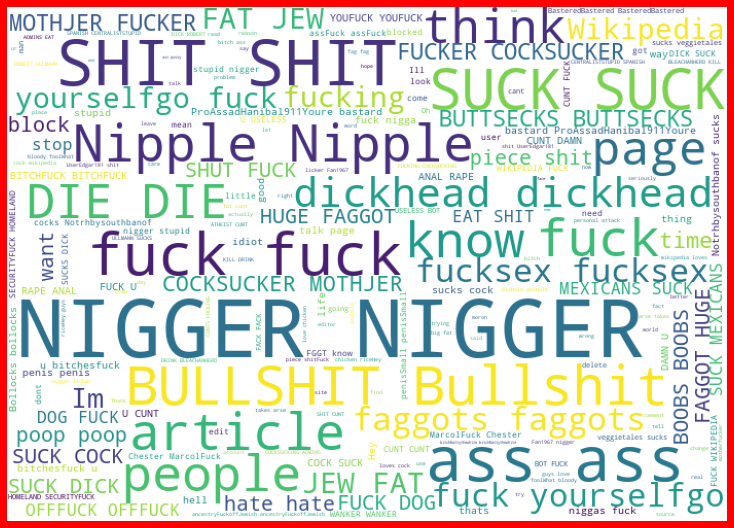

In [19]:
# Getting Sense of Words in Highly_Malignant
plot=dftrain['comment_textnew'][dftrain['rude']==1]
print(len(plot))
plot_cloud=WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

478


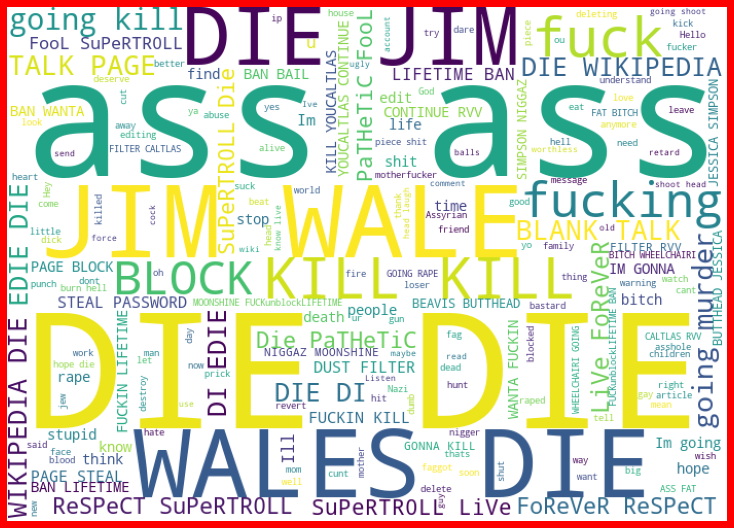

In [20]:
# Getting Sense of words in Highly-Malignant
plot=dftrain['comment_textnew'][dftrain['threat']==1]
print(len(plot))
plot_cloud=WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

7877


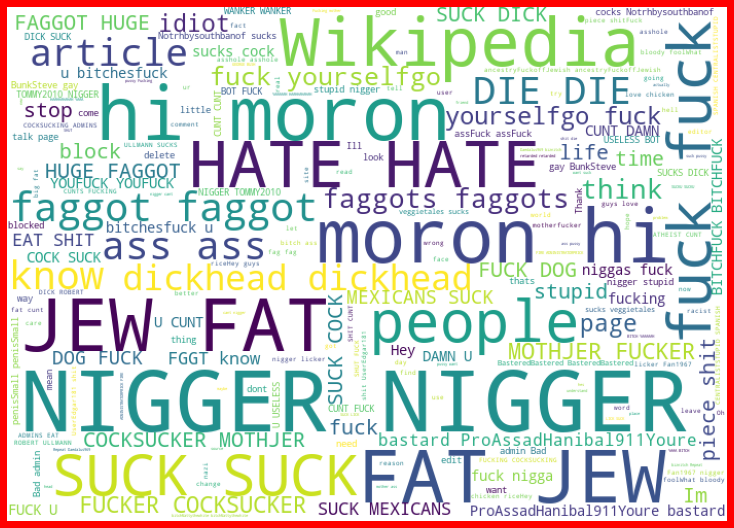

In [21]:
# Getting sense of same words in Highly_Malignant
plot=dftrain['comment_textnew'][dftrain['abuse']==1]
print(len(plot))
plot_cloud=WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

1405


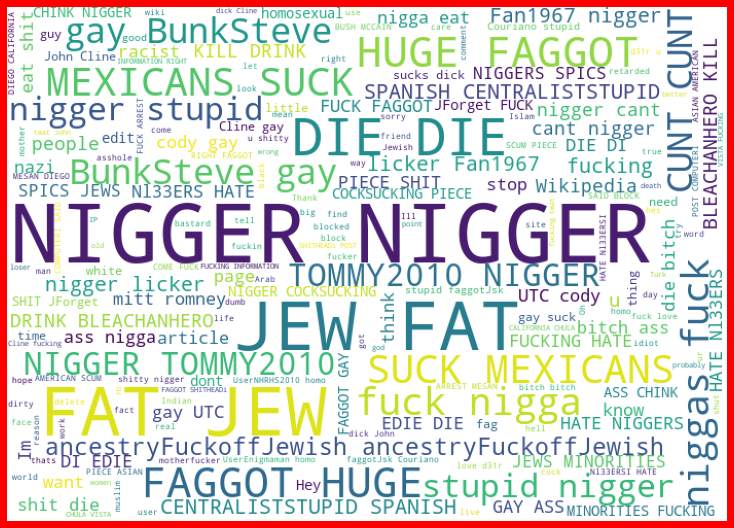

In [22]:
#Getting sense of words in Highly_malignant
plot=dftrain['comment_textnew'][dftrain['loathe']==1]
print(len(plot))
plot_cloud=WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
dftrain[target].sum()

malignant           15294
highly_malignant     1595
loathe               1405
rude                 8449
abuse                7877
threat                478
dtype: int64

In [24]:
dftrain.shape

(159571, 12)

In [25]:
# Adding a column representing the comments with all the characteristics
dftrain['Target']=dftrain[target].sum(axis=1)
dftrain.head(5)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  comments_length  \
0          0                 0     0       0      0       0              264   
1          0                 0     0       0      0       0              112   
2          0                 0     0       0      0       0              233   
3          0                 0     0       0      0       0              622   
4          0                 0     0       0      0       0               67   

                                  comment_text_noise  \
0  [why, the, made, under, my, were, they, weren'...   
1                                         [he, this]   
2  [really, not, to, it's, just, that, this, is, ...   
3  [more, i, make, any, on, i, if, the, should, b...   
4                          [are, my, any, you, what]   

                                     comment_textnew  clean_length  Target  
0  Explanation edits username Hardcore Metallica ...           156       0  
1  Daww matches background colour Im seemingly st...            91       0  
2  Hey man Im trying edit war guy constantly remo...           131       0  
3   cant real suggestions improvement  wondered s...           361       0  
4         You sir hero chance remember page thats on            42       0

In [26]:
dftrain['Target'].unique()

array([0, 4, 1, 3, 2, 5, 6], dtype=int64)

In [27]:
for i in range(0,7):
    print(f'For value:{i}')
    print(dftrain['Target']==(i)).sum()
    print("--------------------------------")

For value:0
0          True
1          True
2          True
3          True
4          True
5          True
6         False
7          True
8          True
9          True
10         True
11         True
12        False
13         True
14         True
15         True
16        False
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
30         True
31         True
32         True
33         True
34         True
35         True
36         True
37         True
38         True
39         True
40         True
41         True
42        False
43        False
44        False
45         True
46         True
47         True
48         True
49         True
50         True
51        False
52         True
53         True
54         True
55        False
56        False
57         True
58        False
59        False
60         True
61         T

AttributeError: 'NoneType' object has no attribute 'sum'

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


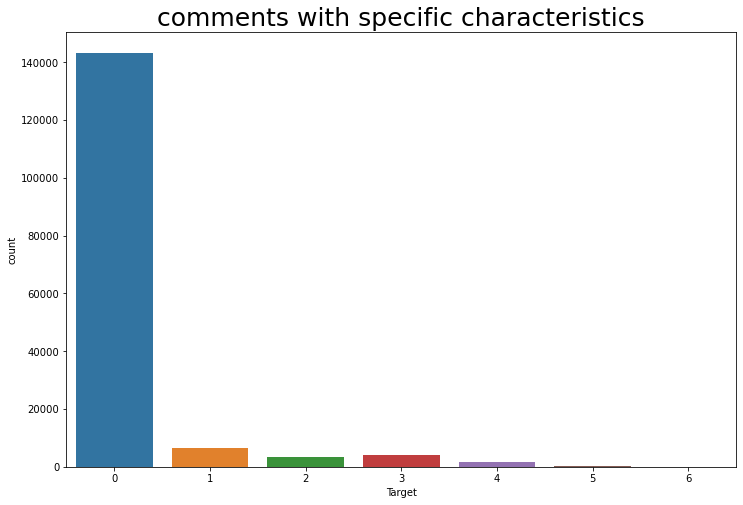

In [28]:
# Comments with all the characteristics
plt.figure(figsize=(12,8))
sns.countplot(dftrain['Target'])
plt.title("comments with specific characteristics",fontsize=25)
plt.show()

In [29]:
dftrain['Target']=dftrain['Target']>0
dftrain['Target']=dftrain['Target'].astype(int)
print(dftrain['Target'].value_counts())

0    143346
1     16225
Name: Target, dtype: int64


In [30]:
dftrain.head(10)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9  00040093b2687caa  alignment on this subject and which are contra...   

   malignant  highly_malignant  rude  threat  abuse  loathe  comments_length  \
0          0                 0     0       0      0       0              264   
1          0                 0     0       0      0       0              112   
2          0                 0     0       0      0       0              233   
3          0                 0     0       0      0       0              622   
4          0                 0     0       0      0       0               67   
5          0                 0     0       0      0       0               65   
6          1                 1     1       0      1       0               44   
7          0                 0     0       0      0       0              115   
8          0                 0     0       0      0       0              472   
9          0                 0     0       0      0       0               70   

                                  comment_text_noise  \
0  [why, the, made, under, my, were, they, weren'...   
1                                         [he, this]   
2  [really, not, to, it's, just, that, this, is, ...   
3  [more, i, make, any, on, i, if, the, should, b...   
4                          [are, my, any, you, what]   
5                                [from, me, as, the]   
6                      [before, you, around, on, my]   
7  [your, to, the, has, been, please, don't, do, ...   
8  [if, the, was, to, not, to, anything, in, the,...   
9         [on, this, and, which, are, to, those, of]   

                                     comment_textnew  clean_length  Target  
0  Explanation edits username Hardcore Metallica ...           156       0  
1  Daww matches background colour Im seemingly st...            91       0  
2  Hey man Im trying edit war guy constantly remo...           131       0  
3   cant real suggestions improvement  wondered s...           361       0  
4         You sir hero chance remember page thats on            42       0  
5         Congratulations well use tools well  talk             43       0  
6                               COCKSUCKER PISS WORK            20       1  
7  vandalism Matt Shirvington article reverted ag...            56       0  
8  Sorry word nonsense offensive you Anyway Im in...           243       0  
9               alignment subject contrary DuLithgow            36       0

In [31]:
dftrain=dftrain.drop(['id'],axis=1)

In [32]:
dftrain.head(10)

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   
5  "\n\nCongratulations from me as well, use the ...          0   
6       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK          1   
7  Your vandalism to the Matt Shirvington article...          0   
8  Sorry if the word 'nonsense' was offensive to ...          0   
9  alignment on this subject and which are contra...          0   

   highly_malignant  rude  threat  abuse  loathe  comments_length  \
0                 0     0       0      0       0              264   
1                 0     0       0      0       0              112   
2                 0     0       0      0       0              233   
3                 0     0       0      0       0              622   
4                 0     0       0      0       0               67   
5                 0     0       0      0       0               65   
6                 1     1       0      1       0               44   
7                 0     0       0      0       0              115   
8                 0     0       0      0       0              472   
9                 0     0       0      0       0               70   

                                  comment_text_noise  \
0  [why, the, made, under, my, were, they, weren'...   
1                                         [he, this]   
2  [really, not, to, it's, just, that, this, is, ...   
3  [more, i, make, any, on, i, if, the, should, b...   
4                          [are, my, any, you, what]   
5                                [from, me, as, the]   
6                      [before, you, around, on, my]   
7  [your, to, the, has, been, please, don't, do, ...   
8  [if, the, was, to, not, to, anything, in, the,...   
9         [on, this, and, which, are, to, those, of]   

                                     comment_textnew  clean_length  Target  
0  Explanation edits username Hardcore Metallica ...           156       0  
1  Daww matches background colour Im seemingly st...            91       0  
2  Hey man Im trying edit war guy constantly remo...           131       0  
3   cant real suggestions improvement  wondered s...           361       0  
4         You sir hero chance remember page thats on            42       0  
5         Congratulations well use tools well  talk             43       0  
6                               COCKSUCKER PISS WORK            20       1  
7  vandalism Matt Shirvington article reverted ag...            56       0  
8  Sorry word nonsense offensive you Anyway Im in...           243       0  
9               alignment subject contrary DuLithgow            36       0

In [33]:
dftrain.Target.unique()

array([0, 1])

# Feature Extraction

In [34]:
tfidf=TfidfVectorizer(max_features=2000)
x=tfidf.fit_transform(dftrain['comment_textnew'])
y=dftrain[['malignant','highly_malignant','rude','threat','abuse','loathe']]

In [35]:
#Creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [36]:
x.shape,y.shape

((159571, 2000), (159571, 6))

In [37]:
x_train.shape , y_train.shape

((111699, 2000), (111699, 6))

# MODEL BUILDING:-
    In this dataset we have 6 target values, which means this is a Multi-classification problems. So we will use Multi-Label classification libraries to build the ML model.

In [38]:
# Importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [39]:
# Importing Error Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,log_loss

In [40]:
!pip install scikit-multilearn

In [41]:
# Importing Multilabel classification Libraries
import skmultilearn
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain

In [42]:
#Declaring models
LR=LogisticRegression()
SVC=LinearSVC(random_state=0)
MNB=MultinomialNB()

In [43]:
#appending models
models=[]
models.append(LR)
models.append(MNB)
models.append(SVC)

#Appending estimators
estimators=[]
estimators.append(BinaryRelevance)
estimators.append(ClassifierChain)

In [44]:
#Creating emptylist
Model=[]
Estimator=[]
F1_score=[]
#Creating a loop to run the data through the models
for model in models:
    
    for estimator in estimators:
        #model fitting
        clf=estimator(model)
        Model.append(model)
        Estimator.append(estimator)
        clf.fit(x_train,y_train)
        clf_pred=clf.predict(x_test)
        #F1_Score
        F1Score=f1_score(clf_pred,y_test,average='micro')
        F1_score.append(F1Score*100)
        #acc=accuracy_score(y_test,clf_pred)
        #ll=log_los(y_test,clf_pred.toaray())
        #print('accuracy',acc)
        #print('log_loss',ll)
        #print('\n')
        #print(classification_report(y_test,clf_pred))
        #print('\n')

In [45]:
#Finalizing the Results
scores=pd.DataFrame({'Model':Model,'Estimator':Estimator,'F1_Score':F1_score})
scores

Model  \
0       LogisticRegression()   
1       LogisticRegression()   
2            MultinomialNB()   
3            MultinomialNB()   
4  LinearSVC(random_state=0)   
5  LinearSVC(random_state=0)   

                                           Estimator   F1_Score  
0  <class 'skmultilearn.problem_transform.br.Bina...  66.313028  
1  <class 'skmultilearn.problem_transform.cc.Clas...  67.614694  
2  <class 'skmultilearn.problem_transform.br.Bina...  59.639007  
3  <class 'skmultilearn.problem_transform.cc.Clas...  57.976950  
4  <class 'skmultilearn.problem_transform.br.Bina...  67.653981  
5  <class 'skmultilearn.problem_transform.cc.Clas...  68.053542

# HYPERPARAMETER TUNING

In [46]:
clf=ClassifierChain(LinearSVC(random_state=0))
clf.fit(x_train,y_train)
clf_pred=clf.predict(x_test)
acc=accuracy_score(y_test,clf_pred)
ll=log_loss(y_test,clf_pred.toarray())
print({'accuracy':acc,'log_loss':ll})

{'accuracy': 0.9180105280748663, 'log_loss': 1.2721748080327815}


In [47]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72      4582
           1       0.54      0.16      0.25       486
           2       0.87      0.68      0.77      2556
           3       0.61      0.25      0.35       136
           4       0.73      0.60      0.65      2389
           5       0.64      0.20      0.30       432

   micro avg       0.83      0.58      0.68     10581
   macro avg       0.71      0.41      0.51     10581
weighted avg       0.82      0.58      0.67     10581
 samples avg       0.05      0.05      0.05     10581



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SAVING THE JOB FILE

In [48]:
#Creating pickle file
import joblib
joblib.dump(clf,'Malignant_Comments_Classifier_FR.pkl')

['Malignant_Comments_Classifier_FR.pkl']

# PREDICITIONS ON THE TEST DATA:-

In [49]:
dftest=pd.read_csv(r'D:\Malignant Comments Classifier Project\malignant_comments_classifier_test.csv')
dftest.head(5)

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [50]:
dftest.shape

(153164, 2)

In [51]:
dftest.drop('id',axis=1,inplace=True)
dftest.head(5)

comment_text
0  Yo bitch Ja Rule is more succesful then you'll...
1  == From RfC == \n\n The title is fine as it is...
2  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  :If you have a look back at the source, the in...
4          I don't anonymously edit articles at all.

# DATA CLEANING :-

In [52]:
dftest['comment_textnew']=dftest['comment_text'].apply(nfx.remove_stopwords) #removing stopwords

In [53]:
#Removing punctuations, special character and URL'S 
dftest['comment_textnew']=dftest['comment_textnew'].apply(nfx.remove_punctuations)
dftest['comment_textnew']=dftest['comment_textnew'].apply(nfx.remove_special_characters)
dftest['comment_textnew']=dftest['comment_textnew'].apply(nfx.remove_phone_numbers)
dftest['comment_textnew']=dftest['comment_textnew'].apply(nfx.remove_urls)

In [54]:
dftest['length']=dftest.comment_text.str.len()
dftest['clean_length']=dftest.comment_textnew.str.len()
dftest.head()

comment_text  \
0  Yo bitch Ja Rule is more succesful then you'll...   
1  == From RfC == \n\n The title is fine as it is...   
2  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3  :If you have a look back at the source, the in...   
4          I don't anonymously edit articles at all.   

                                     comment_textnew  length  clean_length  
0  Yo bitch Ja Rule succesful whats hating sad mo...     367           234  
1                             RfC  title fine is IMO      50            23  
2                   Sources   Zawe Ashton Lapland         54            34  
3  If look source information updated correct for...     205           107  
4                      anonymously edit articles all      41            29

# Test Feature Extraction

In [55]:
#Vectorization 
xtest=tfidf.fit_transform(dftest['comment_textnew'])

In [56]:
#Loading the model
test_model=joblib.load('Malignant_Comments_Classifier_FR.pkl')

# TEST DATA PREDICTIONS

In [57]:
dftest_pred=test_model.predict(xtest)
dftest_predict=dftest_pred.toarray()
Malignant_Comment_predictions=pd.DataFrame(dftest_predict)

In [58]:
Malignant_Comment_predictions.sample(10)

0    1    2    3    4    5
131229  0.0  0.0  0.0  0.0  0.0  0.0
70869   0.0  0.0  0.0  0.0  0.0  0.0
142639  0.0  0.0  0.0  0.0  0.0  0.0
41137   0.0  0.0  0.0  0.0  0.0  0.0
1378    0.0  0.0  0.0  0.0  0.0  0.0
82560   0.0  0.0  0.0  0.0  0.0  0.0
40088   0.0  0.0  0.0  0.0  0.0  0.0
42371   0.0  0.0  0.0  0.0  0.0  0.0
122878  0.0  0.0  0.0  0.0  0.0  0.0
122310  0.0  0.0  0.0  0.0  0.0  0.0

# Saving the test output in csv format

In [64]:
Malignant_Comment_predictions.to_csv(r'D:\Malignant Comments Classifier Project\Malignant_test.csv',index=False)

# Conclusion

We can see that the Linear SVC performs well with 'accuracy':0.919 to the given multi-classification dataset